## Cleaning NYC Airbnb detailed listings dataset
The goal of this notebook is to clean the raw airbnb Amsterdam dataset. The dataset can be found here:http://insideairbnb.com/get-the-data.html.

In [2]:
# Import the necessary packages
# data managing and display libs
import pandas as pd
import numpy as np
import os
import io

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

import seaborn as sns


## Get data from CSV


In [3]:
pd.set_option('display.max_rows',500)
listings= pd.read_csv('listings.csv')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18291 entries, 0 to 18290
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18291 non-null  int64  
 1   listing_url                                   18291 non-null  object 
 2   scrape_id                                     18291 non-null  int64  
 3   last_scraped                                  18291 non-null  object 
 4   name                                          18258 non-null  object 
 5   description                                   17994 non-null  object 
 6   neighborhood_overview                         12023 non-null  object 
 7   picture_url                                   18291 non-null  object 
 8   host_id                                       18291 non-null  int64  
 9   host_url                                      18291 non-null 

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210208155251,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.92
1,20168,https://www.airbnb.com/rooms/20168,20210208155251,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.54
2,25428,https://www.airbnb.com/rooms/25428,20210208155251,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210208155251,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,1.98
4,28871,https://www.airbnb.com/rooms/28871,20210208155251,2021-02-10,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.63


The Detailed listings contains about 74 different features for each of the Airbnb locations. We need to do some EDA to check if we can trim down some features.

In [5]:
print("Detailed Listings row, cols: ", listings.shape)

Detailed Listings row, cols:  (18291, 74)


In [6]:
# check how the data types are distributed.
# pandas does its best to interpret the datatype while reading in
# however it is our duty to check if the datatype makes sense
listings.dtypes.value_counts()

object     33
float64    24
int64      17
dtype: int64

There are about **18291** airbnb listings and each of these listing has associated with it **74 features** describing all aspects of the airbnb listing. However, some of these features might be having missing values, whereas some of them might not be relevant to Machine Learning. The data cleaning step will investigate and tackle these problems.

## Data Cleaning
The focus of this notebook is on cleaning the data and storing the cleaned version.  The strategy employed for cleaning the data is as follows:
- Drop columns that are not relevant to the problem. Example: URL, host picture etc.
- Find missing values for each column.
- Drop columns which have more than 20% missing data. Make a note of the columns.
- Convert columns to their correct data type.
- Subset the dataset based on certain criterion. Ex: property_type = Apartment/House/Townhouse/Condo
- One-hot-encode the categorical variables.

### Drop columns
#### Checking irrelevant Object types
Using `select_dtypes` we can filter out the desired type of columns.

In [7]:
listings.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')

By inspecting some values of object types, it becomes evident that some columns are just not that useful for our analysis. Example, the urls, last_scraped etc. Shown below are a list of columns that we can safely drop without much loss of information needed for our analysis. I have also displayed the head of the object columns to get a sense of why we can drop these columns.

In [8]:
listings.select_dtypes(include=['object']).head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2818,2021-02-11,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",...,Private room in apartment,Private room,1.5 shared baths,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,t,2021-02-11,2009-03-30,2020-02-14,t
1,https://www.airbnb.com/rooms/20168,2021-02-11,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",...,Private room in townhouse,Private room,1 private bath,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,t,2021-02-11,2010-03-02,2020-04-09,t
2,https://www.airbnb.com/rooms/25428,2021-02-10,"Lovely, spacious 1 bed apt in Center(with lift)",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",...,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,t,2021-02-10,2018-01-21,2020-02-09,f
3,https://www.airbnb.com/rooms/27886,2021-02-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",...,Private room in houseboat,Private room,1.5 baths,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",$125.00,t,2021-02-11,2012-01-09,2020-07-25,t
4,https://www.airbnb.com/rooms/28871,2021-02-10,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",...,Private room in apartment,Private room,1 shared bath,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",$75.00,t,2021-02-10,2010-08-22,2020-09-20,f


#### checking irrelevant float64 types

In [9]:
listings.select_dtypes(include=['float64']).columns

Index(['host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [10]:
listings.select_dtypes(include=['float64']).head()

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_minimum_nights,maximum_minimum_nights,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,1.0,1.0,NaN,52.36575,4.94142,NaN,1.0,2.0,3.0,3.0,...,NaN,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,1.92
1,2.0,2.0,NaN,52.36509,4.89354,NaN,1.0,1.0,1.0,4.0,...,NaN,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,2.54
2,2.0,2.0,NaN,52.37297,4.88339,NaN,1.0,1.0,14.0,14.0,...,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,0.13
3,1.0,1.0,NaN,52.38761,4.89188,NaN,1.0,1.0,2.0,2.0,...,NaN,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.98
4,2.0,2.0,NaN,52.36610,4.88953,NaN,1.0,1.0,2.0,2.0,...,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.63


#### checking irrelevant int64 types

In [11]:
listings.select_dtypes(include=['int64']).columns

Index(['id', 'scrape_id', 'host_id', 'accommodates', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [12]:
listings.select_dtypes(include=['int64']).head()

,id,scrape_id,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,20210208155251,3159,2,3,1125,29,46,60,139,278,1,0,1,0,1,0
1,20168,20210208155251,59484,2,1,365,0,0,0,0,339,19,0,2,0,2,0
2,25428,20210208155251,56142,3,14,180,6,36,66,251,5,0,0,1,1,0,0
3,27886,20210208155251,97647,2,2,730,27,55,79,136,219,6,0,1,0,1,0
4,28871,20210208155251,124245,2,2,1825,30,53,78,338,336,13,0,2,0,2,0


In [88]:
# Removing irrelevant columns which is not required for EDA or ML process

df_dl_clean_df = listings.drop(['listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_name','host_thumbnail_url','host_picture_url',
                                          'host_listings_count','calendar_last_scraped', 'minimum_minimum_nights','maximum_maximum_nights','maximum_minimum_nights',
                                          'minimum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','availability_30','availability_60','availability_90',
                                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
                                          'review_scores_value','review_scores_rating','number_of_reviews_ltm','number_of_reviews_l30d','first_review',
                                          'host_since','host_total_listings_count', 'last_review','host_location','host_verifications','reviews_per_month','beds' ],axis=1)



In [89]:
print("Shape of the dataset after dropping: ", df_dl_clean_df.shape)

Shape of the dataset after dropping:  (18291, 37)


### Missing Value Statistics
An important step in data cleaning is identifying columns with missing values. Let's first calculate the missing value statistics.

In [90]:
# missing data percentage
def missing_data_percentage(df):
    missing_info = df.isnull().sum().to_frame()
    missing_info.columns = ['Number_of_missing_data']
    missing_info['Percent_data_missing']= np.round(100*(missing_info['Number_of_missing_data']/df.shape[0]))
    missing_info.sort_values(by=['Number_of_missing_data'],ascending=False,inplace=True)
    return missing_info


Proportion_missing=missing_data_percentage(df_dl_clean_df)
Proportion_missing[Proportion_missing.Percent_data_missing>20]

,Number_of_missing_data,Percent_data_missing
calendar_updated,18291,100.0
license,18291,100.0
neighbourhood_group_cleansed,18291,100.0
bathrooms,18291,100.0
host_response_time,14354,78.0
host_response_rate,14354,78.0
host_acceptance_rate,10495,57.0
host_about,7817,43.0
neighbourhood,6268,34.0
neighborhood_overview,6268,34.0


As we can see in the table above, few columns have 100% missing data. We will be dropping these columns and upon close observation, it makes sense to drop the columns which have more than 20% missing data.

<AxesSubplot:>

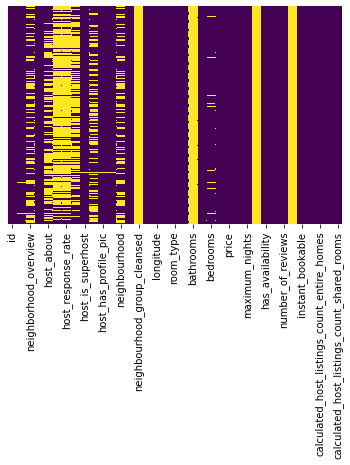

In [91]:
sns.heatmap(df_dl_clean_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
list(Proportion_missing[Proportion_missing.Percent_data_missing>20].index)

['calendar_updated',
 'license',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_about',
 'neighbourhood',
 'neighborhood_overview',
 'host_neighbourhood']

In [93]:
df_dl_clean_df=df_dl_clean_df.drop(list(Proportion_missing[Proportion_missing.Percent_data_missing>20].index),axis='columns')
print(df_dl_clean_df.shape)

(18291, 26)


At this point, we have not fully dealt with missing values. But before we move forward with handling missing values, let's first validate that each of the variable is of the correct type, i.e, categorical and boolean type. Representing all string columns as **object type** is not an effective approach. We need to convert the object types to categorical or boolean if necessary. Another advantage of converting them from object to categorical/boolean is that we can make use of `pd.get_dummies()` to easily one-hot-encode the variables.

### Convert object types to categorical and boolean variables
Shown below is the head of all the object types in the dataset. By inspecting these variables, we can clearly see that some of these object types are actually categorical variables, some are boolean variables and some are text variables like *summary* and *description*. Our task is to identify categorical variables and separate them from text variables. Later, further down in the notebook, we will one-hot-encode all the categorical variables.

In [94]:
df_dl_clean_df.select_dtypes(['object']).head()

,description,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,instant_bookable
0,Quiet Garden View Room & Super Fast WiFi<br />...,t,t,t,Oostelijk Havengebied - Indische Buurt,Private room in apartment,Private room,1.5 shared baths,"[""Hangers"", ""Coffee maker"", ""Paid parking on p...",$59.00,t,t
1,17th century Dutch townhouse in the heart of t...,f,t,t,Centrum-Oost,Private room in townhouse,Private room,1 private bath,"[""Essentials"", ""Bed linens"", ""Hot water"", ""Han...",$129.00,t,t
2,Lovely apt in Centre ( lift & fireplace) near ...,t,t,f,Centrum-West,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Elevator"", ""Cooking basics"", ""Dis...",$125.00,t,f
3,Stylish and romantic houseboat on fantastic hi...,t,t,t,Centrum-West,Private room in houseboat,Private room,1.5 baths,"[""Patio or balcony"", ""Hangers"", ""Dishes and si...",$125.00,t,t
4,<b>The space</b><br />In a monumental house ri...,t,t,t,Centrum-Oost,Private room in apartment,Private room,1 shared bath,"[""Hot water"", ""Essentials"", ""Smoke alarm"", ""Ha...",$75.00,t,f


In [95]:
# collect all variables which need to be dummy encoded.
categorical_types = ['host_is_superhost',
                     'host_has_profile_pic',
                     'host_identity_verified',
                     'property_type',
                     'room_type',
                     'has_availability',
                     'instant_bookable',
                    'bathrooms_text']

In [96]:
df_dl_clean_df[categorical_types].dtypes

host_is_superhost         object
host_has_profile_pic      object
host_identity_verified    object
property_type             object
room_type                 object
has_availability          object
instant_bookable          object
bathrooms_text            object
dtype: object

As we can see, these columns are all of the type object. Representing them as categories is much more efficient. 

In [97]:
df_dl_clean_df[categorical_types] = df_dl_clean_df[categorical_types].apply(lambda x: x.astype('category'), 
                                                                                axis='rows')
df_dl_clean_df[categorical_types].dtypes

host_is_superhost         category
host_has_profile_pic      category
host_identity_verified    category
property_type             category
room_type                 category
has_availability          category
instant_bookable          category
bathrooms_text            category
dtype: object

### Subset the dataset
#### Checking for unique values in each category
Let's check how many unique values each of these columns have. This can be achieved using the `pd.Series.nunique` method.

host_is_superhost          2
host_has_profile_pic       2
host_identity_verified     2
property_type             65
room_type                  4
has_availability           2
instant_bookable           2
bathrooms_text            27
dtype: int64


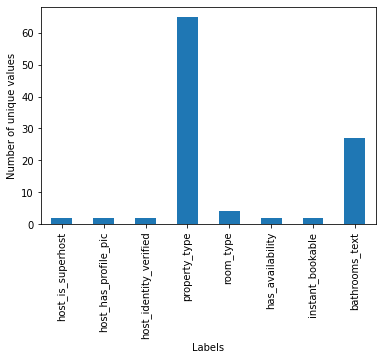

In [98]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_values = df_dl_clean_df[categorical_types].apply(pd.Series.nunique, axis='rows')
print(num_unique_values)

# Plot number of unique values for each label
num_unique_values.plot(kind='bar')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

It appears there are far too many property types in this data. Let's check why that is. Looking at the below numbers, we can see that NYC has many peculiar properties, for instance, *Treehouse*, *boat*, *Earth house* etc. To stay focused, we will restrict our analysis to *Apartment*, *House*, *Townhouse*, *condominium* and *private room*.  

In [99]:
df_dl_clean_df.property_type.value_counts()

Entire apartment                      11393
Private room in apartment              2218
Entire house                           1198
Entire townhouse                        472
Private room in bed and breakfast       344
Private room in house                   339
Entire condominium                      261
Entire loft                             261
Houseboat                               199
Boat                                    198
Private room in townhouse               168
Entire serviced apartment               149
Room in boutique hotel                  135
Private room in houseboat               117
Private room in guest suite             103
Private room in boat                     96
Room in hotel                            90
Private room in condominium              83
Private room in loft                     55
Room in bed and breakfast                49
Entire guest suite                       42
Shared room in apartment                 29
Entire villa                    

Since I am subsetting the dataset, I created a new one, so that we have a copy of the original dataset with all the property types.

In [100]:
df_dl_clean_df.to_csv("detailed_listings_without_subset_partially_cleaned.csv", index=False)

In [101]:
def top7_categories(df,variable):
    return list(df[variable].value_counts().nlargest(7).index.tolist())

In [102]:
top7_categories(df_dl_clean_df,'property_type')

['Entire apartment',
 'Private room in apartment',
 'Entire house',
 'Entire townhouse',
 'Private room in bed and breakfast',
 'Private room in house',
 'Entire condominium']

In [103]:
# Subset the data to include few property types
df_airbnb = df_dl_clean_df[df_dl_clean_df.property_type.isin(top7_categories(df_dl_clean_df,'property_type'))]

In [104]:
# let pandas know that to use a copy instead of a view
df_airbnb = df_airbnb.copy()

# We need to remove unused categories since we are using type category,
# the removed categories are retained with count of 0.
# so, we need to explicitly remove the unused categories.
df_airbnb.loc[:, 'property_type'] = df_airbnb.loc[:,'property_type'].cat.remove_unused_categories()

In [105]:
df_airbnb.property_type.value_counts()

Entire apartment                     11393
Private room in apartment             2218
Entire house                          1198
Entire townhouse                       472
Private room in bed and breakfast      344
Private room in house                  339
Entire condominium                     261
Name: property_type, dtype: int64

In [106]:
df_airbnb.head()

,id,description,host_id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,...,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2818,Quiet Garden View Room & Super Fast WiFi<br />...,3159,t,t,t,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,...,3,1125,t,139,278,t,1,0,1,0
2,25428,Lovely apt in Centre ( lift & fireplace) near ...,56142,t,t,f,Centrum-West,52.37297,4.88339,Entire apartment,...,14,180,t,251,5,f,1,1,0,0
4,28871,<b>The space</b><br />In a monumental house ri...,124245,t,t,t,Centrum-Oost,52.36610,4.88953,Private room in apartment,...,2,1825,t,338,336,f,2,0,2,0
5,29051,This room can also accomodate 2 people. For a...,124245,t,t,t,Centrum-Oost,52.36607,4.89100,Private room in apartment,...,2,730,t,355,480,f,2,0,2,0
6,31080,<b>The space</b><br />My apartment is light an...,133488,f,t,t,Zuid,52.35132,4.84838,Entire apartment,...,3,365,t,0,32,f,1,1,0,0


### Missing Value Statistics for the subset

In [107]:
missing_df = missing_data_percentage(df_airbnb)
missing_df

,Number_of_missing_data,Percent_data_missing
bedrooms,768,5.0
description,252,2.0
host_is_superhost,63,0.0
host_has_profile_pic,63,0.0
host_identity_verified,63,0.0
bathrooms_text,6,0.0
minimum_nights,0,0.0
calculated_host_listings_count_private_rooms,0,0.0
calculated_host_listings_count_entire_homes,0,0.0
calculated_host_listings_count,0,0.0


The missing values for columns starting with host seem to have a pattern. Since all these columns have 63 missing values, it could be possible that the data is missing purpose.

In [108]:
# collect all the columns which have missing values
cols_missing_values = list(missing_df[Proportion_missing.Number_of_missing_data > 0].index)

df_airbnb_missing_values = df_airbnb[cols_missing_values]
df_airbnb_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 18290
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bedrooms                15457 non-null  float64 
 1   description             15973 non-null  object  
 2   host_is_superhost       16162 non-null  category
 3   host_has_profile_pic    16162 non-null  category
 4   host_identity_verified  16162 non-null  category
 5   bathrooms_text          16219 non-null  category
dtypes: category(4), float64(1), object(1)
memory usage: 445.3+ KB


<ipython-input-108-aaaf711b43a5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cols_missing_values = list(missing_df[Proportion_missing.Number_of_missing_data > 0].index)


Check if the 63 missing values of host columns are are missing together.

In [109]:
host_cols = list(df_airbnb_missing_values.columns[df_airbnb_missing_values.columns.str.contains('host')])
df_airbnb_missing_values[host_cols][df_airbnb_missing_values.host_identity_verified.isnull()]

,host_is_superhost,host_has_profile_pic,host_identity_verified
203,NaN,NaN,NaN
690,NaN,NaN,NaN
898,NaN,NaN,NaN
1404,NaN,NaN,NaN
1716,NaN,NaN,NaN
1885,NaN,NaN,NaN
2045,NaN,NaN,NaN
2509,NaN,NaN,NaN
2751,NaN,NaN,NaN
3371,NaN,NaN,NaN


Yes, as suspected, these host columns have missing values for the same observations.
according to our findings, it is clearly visible that the missing value in these columns are for same observation, might be due to some reason.

### Handling Missing Values
- For columns containing text, we will be replacing them with an empty string.
- For categorical columns, we will be replacing missing values with the mode.
- For continuous columns, we will be replacing the missing values with the median.

I will be using sklearn's `SimpleImputer` to replace the missing values.

In [110]:
df_airbnb_clean = df_airbnb.copy(deep=True)
df_airbnb_clean.shape

(16225, 26)

In [111]:
df_airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 18290
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            16225 non-null  int64   
 1   description                                   15973 non-null  object  
 2   host_id                                       16225 non-null  int64   
 3   host_is_superhost                             16162 non-null  category
 4   host_has_profile_pic                          16162 non-null  category
 5   host_identity_verified                        16162 non-null  category
 6   neighbourhood_cleansed                        16225 non-null  object  
 7   latitude                                      16225 non-null  float64 
 8   longitude                                     16225 non-null  float64 
 9   property_type                                 1622

In [112]:
# to avoid setcopywithwarning use .copy() - this will tell pandas use a copy and not a view.
df_airbnb_clean.loc[df_airbnb_clean.description.isna().copy(), 'description'] = ''

**CATEGORICAL COLUMNS**:

In [113]:
from sklearn.impute import SimpleImputer
category_missing_cols = ['host_has_profile_pic', 'host_identity_verified', 
                         'host_is_superhost']

float_missing_cols = ['bedrooms']

For validation purpose, lets first check the `float_missing_cols`. Example, check the bathrooms and bedrooms columns, you will notice there are some NaN values in there. If the missing value imputation is successful, then we should expect to see these NaN values replaced by their median values.

In [114]:
def replace_missing_values(cols, df):
    '''
        Takes a list of columns and a dataframe and imputes based on
        the column type. If it is object type, then most_frequent value
        is used for imputation. If it is a float/int type, then the median
        value is used for imputation.
        arguments:
            cols: list of columns
            df : dataframe containing these columns.
        returns:
            df: the imputed dataframe
    '''
    for col in cols:
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("Imputing {} column with most frequent value".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print("Imputing {} column with median value".format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])
        else:
            raise ValueError("Invalid column type")
    
    return df

In [115]:
df_airbnb_clean = replace_missing_values(float_missing_cols, df_airbnb_clean)
df_airbnb_clean = replace_missing_values(category_missing_cols, df_airbnb_clean)

Imputing bedrooms column with median value
Imputing host_has_profile_pic column with most frequent value
Imputing host_identity_verified column with most frequent value
Imputing host_is_superhost column with most frequent value


After imputation, we have successfully removed all the missing values.

<AxesSubplot:>

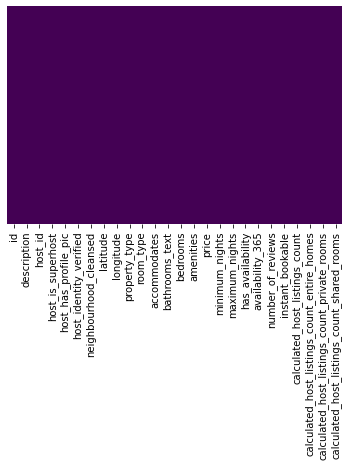

In [116]:
sns.heatmap(df_airbnb_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [117]:
df_airbnb_clean.isna().sum()

id                                              0
description                                     0
host_id                                         0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  6
bedrooms                                        0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_365                                0


## Clean the columns
Some columns like `price` are represented as objects since we have a dollar sign. Before we proceed further with our analysis, we need to clean these columns. 

#### Cleaning price column

In [118]:
df_airbnb_clean.price.head()

0     $59.00
2    $125.00
4     $75.00
5     $55.00
6    $219.00
Name: price, dtype: object

In [119]:
import re
 # as Price variable due to dollar sign been extracted as object type, we remove the dollar sign and change its dtype to float.
df_airbnb_clean['price']=df_airbnb.price.str.replace('$','').str.replace(',', '').astype('float')

<ipython-input-119-d705cd9f2956>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_airbnb_clean['price']=df_airbnb.price.str.replace('$','').str.replace(',', '').astype('float')


In [120]:
df_airbnb_clean.price.head()

0     59.0
2    125.0
4     75.0
5     55.0
6    219.0
Name: price, dtype: float64

<AxesSubplot:>

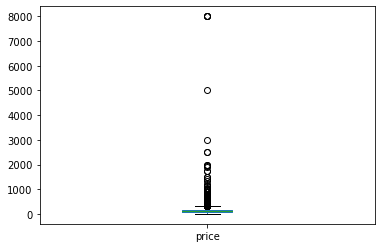

In [121]:
df_airbnb_clean[['price']].plot(kind='box')

Price has quite many outliers, we will deal with outliers in the next stage.

Changing "bathroom_text" column to "Number of bathroom".
Changing its dtype and format

In [122]:
df_airbnb_clean.bathrooms_text.head()

0    1.5 shared baths
2              1 bath
4       1 shared bath
5       1 shared bath
6              1 bath
Name: bathrooms_text, dtype: category
Categories (27, object): ['0 baths', '0 shared baths', '1 bath', '1 private bath', ..., '8 baths', 'Half-bath', 'Private half-bath', 'Shared half-bath']

In [123]:
# creating new column/variable which describe how many bathrooms are available in that rental place.

# renaming some categories to approtiate categories 
df_airbnb_clean=df_airbnb_clean.replace({'bathrooms_text' : { 'Private half-bath' : '0.5 private bath', 'Shared half-bath' : '0.5 shared bath', 'Half-bath' : '0.5 bath' }})

# creating new column to describe number of bathrooms
df_airbnb_clean['Number_of_bathrooms']=df_airbnb_clean['bathrooms_text'].str.split(' ',1).str[0].astype('float')

# Droping Bathroom text column
df_airbnb_clean=df_airbnb_clean.drop(['bathrooms_text'],axis=1)

In [124]:
df_airbnb_clean.Number_of_bathrooms.head()

0    1.5
2    1.0
4    1.0
5    1.0
6    1.0
Name: Number_of_bathrooms, dtype: float64

## Next step: identifying outliers and treating them

In [125]:
#Converting all int64 columns to float 64
int64= df_airbnb_clean.select_dtypes(['int64'])
int64_list= list(int64.columns)

In [126]:
int64_list

['id',
 'host_id',
 'accommodates',
 'minimum_nights',
 'maximum_nights',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [127]:
df_airbnb_clean[int64_list]=df_airbnb_clean[int64_list].apply(lambda x: x.astype('float64'), axis='rows')
df_airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 0 to 18290
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            16225 non-null  float64 
 1   description                                   16225 non-null  object  
 2   host_id                                       16225 non-null  float64 
 3   host_is_superhost                             16225 non-null  object  
 4   host_has_profile_pic                          16225 non-null  object  
 5   host_identity_verified                        16225 non-null  object  
 6   neighbourhood_cleansed                        16225 non-null  object  
 7   latitude                                      16225 non-null  float64 
 8   longitude                                     16225 non-null  float64 
 9   property_type                                 1622

Outlier_stats takes a dataframe and returns outlier statistics for that dataframe. One standard way of identifying outliers is using this formula

Formula: {data_point < first quartile – (1.5) IQR} (or) {data_point > third quartile + (1.5) IQR}

In [128]:
# Check if each value of mySeries lies within the outlier range.
# If the value is greater than upperOutlier mark it True
# If the value is lower than lowerOutlier mark it True
# return the total number of outliers for that series.
def numberOfOutliers(mySeries, upperOutlier, lowerOutlier):
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) |\
               (mySeries < lowerOutlier.loc[mySeries.name,]))

def outlier_stats(df):
    numericDescribe = (df.describe(include='all').T).round(decimals=3)
    
    # Calculate outliers using this formula: first quartile – 1.5·IQR > outlier > third quartile + 1.5·IQR
    numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
    numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))
    
    # Calculate IQR for each column of the dataframe.
    IQR = df.quantile(.75) - df.quantile(.25)
    
    # Calculate the upper and lower outlier values
    upperOutlier = df.quantile(.75) + (1.5 * (IQR))
    lowerOutlier = df.quantile(.25) - (1.5 * (IQR))
    
    # Store the result in a new column
    numericDescribe['num_outliers'] = df.apply(numberOfOutliers, args=(upperOutlier, lowerOutlier))
    numericDescribe.sort_values('num_outliers', ascending=False, inplace=True)
    newColOrder = ['count', 'outliers', 'num_outliers', 'IQR', 'mean', 'std', \
               'min', '25%', '50%', '75%', 'max']
    numericDescribe = numericDescribe.reindex(columns=newColOrder)
    
    return numericDescribe

In [129]:
# Seperating numeric columns
df_outlier_handling=df_airbnb_clean.select_dtypes(['float64'])

In [130]:
outlier_stats_df = outlier_stats(df_outlier_handling)
outlier_stats_df


,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
calculated_host_listings_count_entire_homes,16225.0,True,3949,0.000000e+00,2.167000e+00,8.781000e+00,0.000,1.000,1.000000e+00,1.000000e+00,8.400000e+01
calculated_host_listings_count_private_rooms,16225.0,True,3508,0.000000e+00,3.470000e-01,1.131000e+00,0.000,0.000,0.000000e+00,0.000000e+00,2.100000e+01
calculated_host_listings_count,16225.0,True,2849,0.000000e+00,2.526000e+00,8.913000e+00,1.000,1.000,1.000000e+00,1.000000e+00,8.500000e+01
availability_365,16225.0,True,2731,4.000000e+01,5.242100e+01,1.070720e+02,0.000,0.000,0.000000e+00,4.000000e+01,3.650000e+02
minimum_nights,16225.0,True,2188,1.000000e+00,3.844000e+00,1.720200e+01,1.000,2.000,2.000000e+00,3.000000e+00,1.001000e+03
host_id,16225.0,True,1582,7.028683e+07,6.174023e+07,7.968614e+07,3159.000,9164546.000,2.676540e+07,7.945138e+07,3.871001e+08
number_of_reviews,16225.0,True,1490,1.800000e+01,2.102200e+01,4.709700e+01,0.000,2.000,8.000000e+00,2.000000e+01,7.830000e+02
price,16225.0,True,717,8.400000e+01,1.521350e+02,1.664460e+02,4.000,95.000,1.290000e+02,1.790000e+02,8.000000e+03
latitude,16225.0,True,615,2.000000e-02,5.236500e+01,1.600000e-02,52.289,52.355,5.236400e+01,5.237500e+01,5.242500e+01
bedrooms,16225.0,True,465,1.000000e+00,1.503000e+00,7.910000e-01,1.000,1.000,1.000000e+00,2.000000e+00,1.200000e+01


From the above output, we can clearly see that the price column and couple of others have outliers. Using subject matter expertise, we must investigate these outliers individually. For instance the host_listings and minimum_nights have absurdly high values which could be an error on the part of the owner in entering these values. Alternatively, these could be special properties which are not open for all customers but reserved for people who want to sub-lease these properties. For this reason, I decided to drop these columns.


## Dealing with outlier

Price has many outliers, however, upon closer examination, it was observed that the price given was for minimum_nights and not per night. For this reason, I have constructed a new feature here called price_adjusted which is the price per night.

In [131]:
df_airbnb_clean['price_adjusted'] = df_airbnb_clean['price'] / df_airbnb_clean['minimum_nights']

In [132]:
df_airbnb_clean.drop(['price', 'minimum_nights'], axis='columns', inplace=True)

# Feature Engineering

## Turn text columns into numeric features
### Feature Engineering:

In this notebook, we will create new features from the cleaned dataset. The following are the goals of this step:

For the amenities column, create a bag-of-words representation.

Merge this into one dataframe

#### First Amenities column

In [133]:
df_airbnb_clean.amenities.head()

0    ["Hangers", "Coffee maker", "Paid parking on p...
2    ["Hangers", "Elevator", "Cooking basics", "Dis...
4    ["Hot water", "Essentials", "Smoke alarm", "Ha...
5    ["Hot water", "Essentials", "Bed linens", "Han...
6    ["Patio or balcony", "Cooking basics", "Dishes...
Name: amenities, dtype: object

In [138]:
# Removing brackets
df_airbnb_clean['amenities'] =  df_airbnb_clean['amenities'].apply(lambda x: x[1:-1])

In [139]:
df_airbnb_clean.amenities.head()

0    "Hangers", "Coffee maker", "Paid parking on pr...
2    "Hangers", "Elevator", "Cooking basics", "Dish...
4    "Hot water", "Essentials", "Smoke alarm", "Han...
5    "Hot water", "Essentials", "Bed linens", "Hang...
6    "Patio or balcony", "Cooking basics", "Dishes ...
Name: amenities, dtype: object

In [141]:
amenities = df_airbnb_clean.amenities

In [149]:
# create a dictionary of terms
amenities_index ={}
index = 0
corpus = []
for i in range(len(amenities)):
    amenities[i] = items
    items_lower = items.lower()
    tokens = items_lower.split(',')
    corpus.append(tokens)
    for token in tokens:
        if token not in amenities_index:
            amenities_index[token] = index
            idx += 1

<ipython-input-149-2748714bcb79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities[i] = items


In [150]:
print("Total number of terms in the corpus: ", len(amenities_idx))
print("Total number of documents in the corpus: ", len(corpus))

Total number of terms in the corpus:  27
Total number of documents in the corpus:  16225


In [151]:
# Get the number of items and tokens 
M = len(amenities)
N = len(amenities_index)

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [152]:
# Define the amenity_encoder function
def amenity_encoder(tokens):
    x = np.zeros(N)
    for token in tokens:
        # Get the index for each amenity
        index = amenities_index[token]
        # Put 1 at the corresponding indices
        x[index] = 1
    return x

In [153]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = amenity_encoder(tokens)
    i = i + 1

In [154]:
A.shape

(17820, 27)

In [169]:
amenities_features = pd.DataFrame(A, columns=list(amenities_index.keys()))
amenities_features.head()

,"""hangers""","""coffee maker""","""paid parking on premises""","""long term stays allowed""","""first aid kit""","""bed linens""","""lock on bedroom door""","""private entrance""","""carbon monoxide alarm""","""dedicated workspace""",...,"""hair dryer""","""essentials""","""smoke alarm""","""washer""","""refrigerator""","""iron""","""shampoo""","""ethernet connection""","""wifi""","""fire extinguisher"""
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# clean the column names and prefix them with amenities
amenities_features.columns

Index(['"hangers"', ' "coffee maker"', ' "paid parking on premises"',
       ' "long term stays allowed"', ' "first aid kit"', ' "bed linens"',
       ' "lock on bedroom door"', ' "private entrance"',
       ' "carbon monoxide alarm"', ' "dedicated workspace"',
       ' "host greets you"', ' "single level home"',
       ' "extra pillows and blankets"', ' "hot water"',
       ' "paid parking off premises"', ' "heating"', ' "garden or backyard"',
       ' "hair dryer"', ' "essentials"', ' "smoke alarm"', ' "washer"',
       ' "refrigerator"', ' "iron"', ' "shampoo"', ' "ethernet connection"',
       ' "wifi"', ' "fire extinguisher"'],
      dtype='object')

In [172]:
import re
def clean_column(text):
    # sub spaces with underscore
    text = re.sub(r'[\s+]', '_', text)
    # remove ""
    text = re.sub(r'[\"]', '', text)
    
    return text

In [173]:
amenities_features.columns = ["amenities_" + clean_column(item) for item in list(amenities_features.columns)]


In [174]:
amenities_features.head()


,amenities_hangers,amenities__coffee_maker,amenities__paid_parking_on_premises,amenities__long_term_stays_allowed,amenities__first_aid_kit,amenities__bed_linens,amenities__lock_on_bedroom_door,amenities__private_entrance,amenities__carbon_monoxide_alarm,amenities__dedicated_workspace,...,amenities__hair_dryer,amenities__essentials,amenities__smoke_alarm,amenities__washer,amenities__refrigerator,amenities__iron,amenities__shampoo,amenities__ethernet_connection,amenities__wifi,amenities__fire_extinguisher
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Saving Clean Dataframe file


In [181]:
#Saving single file output 
df_airbnb_clean.to_csv("Airbnb_cleaned.csv", index=False)
amenities_features.to_csv("Amenities_features.csv", index=False)
